In [2]:
# Importando bibliotecas
import numpy as np
import math
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize,LogNorm,LinearSegmentedColormap
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq,fftshift
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from scipy.signal import spectrogram

## 1. Definição dos sinais no tempo 

Definiremos um sinal como sendo uma senoide simples

$$
x(t) = A \sin(2\pi f t + \phi)
$$

In [37]:
# Vetor com os intervalos de tempo
sampling_rate = 1000
T = 1/sampling_rate         
t = np.arange(0, 1, T)

# Sinal no tempo
x = 1 * np.sin(2 * np.pi *10* t)

Agora vamos construir um ruido gaussiano branco $r(t) \thicksim \mathcal{N}(0,1)$

$$
r(t) = \frac{1}{\sqrt{2 \pi}} e^\frac{-t^2}{2}
$$

In [4]:
ruido = np.random.normal(0,1,sampling_rate)

## 2. Análise e visualização dos sinais no tempo

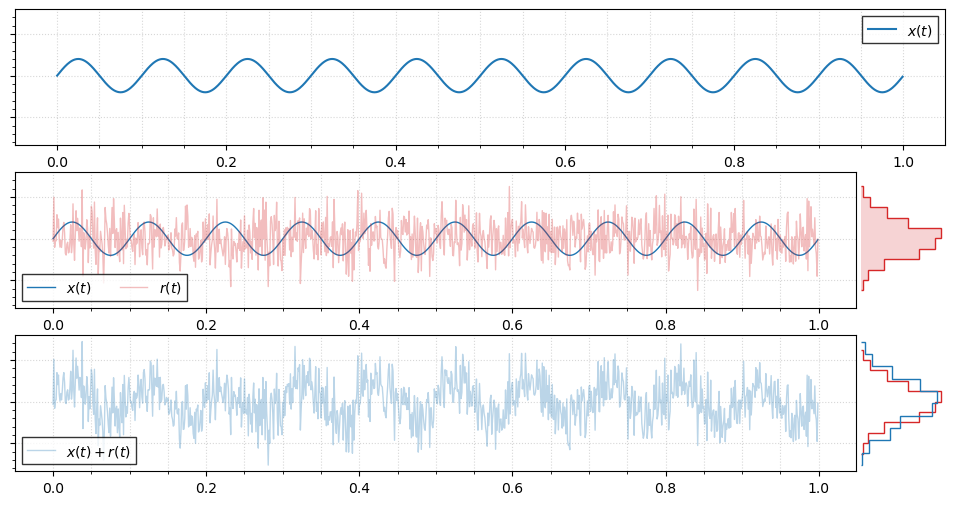

In [50]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(3, 2, figure=fig,height_ratios=[1,1,1],width_ratios=[10,1],wspace=0.01)

ax0 = fig.add_subplot(gs[0,:],sharey=ax2)
ax1 = fig.add_subplot(gs[1,0],sharey=ax2)
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[2,0],sharey=ax2)
ax4 = fig.add_subplot(gs[2,1])

# Sinal original no tempo
ax0.plot(t,x,color='tab:blue',label='$x(t)$')
ax0.legend(fancybox=False, edgecolor='k')

# Sinal com ruido no tempo
ax1.plot(t,x,color='tab:blue',lw=1,label='$x(t)$')
ax1.plot(t,ruido,color='tab:red',lw=1,alpha=0.3,label='$r(t)$')
ax1.legend(fancybox=False, edgecolor='k',ncols=2)

# Histograma do ruido
ax2.hist(ruido,orientation='horizontal',histtype='step',color='tab:red',lw=1)
ax2.hist(ruido,orientation='horizontal',color='tab:red',alpha=0.2,lw=1)
ax2.axis('off')

# Histograma do ruido com o sinal
ax3.plot(t,x+ruido,color='tab:blue',lw=1,alpha=0.3,label='$x(t)+r(t)$')
ax3.legend(fancybox=False, edgecolor='k')
ax4.hist(ruido,orientation='horizontal',histtype='step',color='tab:red')
ax4.hist(x+ruido,orientation='horizontal',histtype='step',color='tab:blue')
ax4.axis('off')

for ax in [ax0,ax1,ax2,ax3]:
    ax.set_yticklabels([])
    ax.minorticks_on()
    ax.grid(True,alpha=0.5,axis='x',which='both',ls='dotted')
    ax.grid(True,alpha=0.5,axis='y',which='major',ls='dotted')

plt.show()

## 3. Analisando o sinal na frequência

Para $x(t) = A \sin(\omega_0 t + \phi)$, sua transformada de Fourier $\mathcal{F}$ é dada por:

$$
X(j\omega) = -j\pi [\delta(\omega-\omega_0) - \delta(\omega+\omega_0)]
$$

Isto é, para o módulo, esperamos dois impulsos nas posições $\pm \omega_0$

In [57]:
# Compute the Fourier Transform of the signal
fft_signal, fft_ruido = np.fft.fft(x), np.fft.fft(ruido)

In [58]:
fft_freq = np.fft.fftfreq(len(x), T)

In [59]:
# Compute mag_sinal and phase_sinal
mag_sinal, mag_ruido = np.abs(fft_signal), np.abs(fft_ruido)
phase_sinal, phase_ruido = 180*np.angle(fft_signal)/(np.pi), 180*np.angle(fft_ruido)/(np.pi)

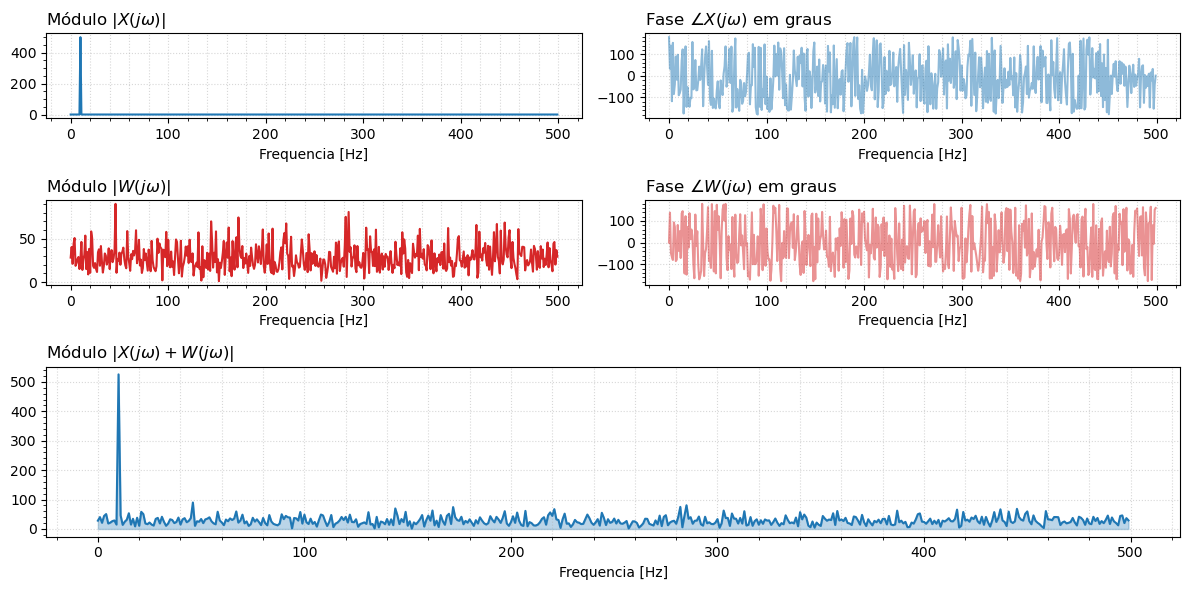

In [67]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[1,1,2])

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,:])

# Magnitude da transformada do sinal 
ax0.plot(fft_freq[:len(fft_freq)//2], mag_sinal[:len(mag_sinal)//2],color='tab:blue')
ax0.set_title(r'Módulo $|X(j\omega)|$',loc='left')
ax0.set_xlabel('Frequencia [Hz]')

# Fase da transformada do sinal
ax1.plot(fft_freq[:len(fft_freq)//2], phase_sinal[:len(phase_sinal)//2],color='tab:blue',alpha=0.5)
ax1.set_title(r'Fase $\angle X(j\omega)$ em graus',loc='left')
ax1.set_xlabel('Frequencia [Hz]')

# Magnitude da transformada do ruido 
ax2.plot(fft_freq[:len(fft_freq)//2], mag_ruido[:len(mag_ruido)//2],color='tab:red')
ax2.set_title(r'Módulo $|W(j\omega)|$',loc='left')
ax2.set_xlabel('Frequencia [Hz]')

# Fase da transformada do ruido
ax3.plot(fft_freq[:len(fft_freq)//2], phase_ruido[:len(phase_ruido)//2],color='tab:red',alpha=0.5)
ax3.set_title(r'Fase $\angle W(j\omega)$ em graus',loc='left')
ax3.set_xlabel('Frequencia [Hz]')

# Magnitude da transformada do ruido 
ax4.plot(fft_freq[:len(fft_freq)//2], (mag_sinal + mag_ruido)[:len(mag_sinal)//2],color='tab:blue')
ax4.fill_between(fft_freq[:len(fft_freq)//2], (mag_sinal + mag_ruido)[:len(mag_sinal)//2],color='tab:blue',alpha=0.3)
ax4.set_title(r'Módulo $|X(j\omega)+W(j\omega)|$',loc='left')
ax4.set_xlabel('Frequencia [Hz]')


for ax in [ax0,ax1,ax2,ax3,ax4]:
    ax.minorticks_on()
    ax.grid(True,alpha=0.5,axis='x',which='both',ls='dotted')
    ax.grid(True,alpha=0.5,axis='y',which='major',ls='dotted')

plt.tight_layout()
plt.show()

> Do esquema acima, fica evidente que a presença do ruído no sinal $x(t)$, produz pontos de amplitudes não nulas em frequências diferentes da do sinal original. Por outro lado, ainda fica claro aonde está a frequência de pico. Isso nos permite traçar um <i>treshold</i> de amplitude mínima, de modo que toda componente com amplitude inferior a esse valor será eliminada.

### Espectro de Densidade de Energia

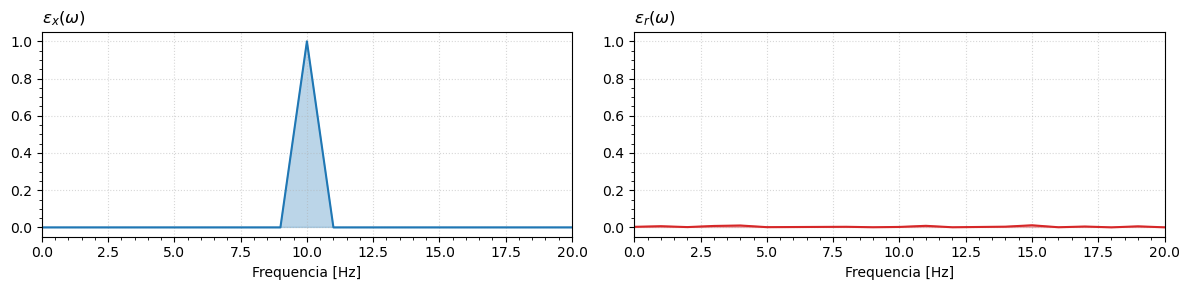

In [76]:
fig = plt.figure(figsize=(12, 3))
gs = gridspec.GridSpec(1, 2, figure=fig)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1],sharey=ax0,sharex=ax0)

# Densidade de energia do sinal
ax0.plot(fft_freq[:len(fft_freq)//2], ((2/sampling_rate)*mag_sinal[:len(mag_sinal)//2])**2,color='tab:blue')
ax0.fill_between(fft_freq[:len(fft_freq)//2], ((2/sampling_rate)*mag_sinal[:len(mag_sinal)//2])**2,color='tab:blue',alpha=0.3)
ax0.set_title(r'$\varepsilon_{x}(\omega)$',loc='left')
ax0.set_xlabel('Frequencia [Hz]')

# Densidade de energia do ruido
ax1.plot(fft_freq[:len(fft_freq)//2], ((2/sampling_rate)*mag_ruido[:len(mag_ruido)//2])**2,color='tab:red')
ax1.fill_between(fft_freq[:len(fft_freq)//2], ((2/sampling_rate)*mag_ruido[:len(mag_ruido)//2])**2,color='tab:red',alpha=0.3)
ax1.set_title(r'$\varepsilon_{r}(\omega)$',loc='left')
ax1.set_xlabel('Frequencia [Hz]')

for ax in [ax0,ax1]:
    ax.set_xlim(0,20)
    ax.minorticks_on()
    ax.grid(True,alpha=0.5,axis='x',which='major',ls='dotted')
    ax.grid(True,alpha=0.5,axis='y',which='major',ls='dotted')

plt.tight_layout()
plt.show()

## Espectograma

In [79]:
# Espectograma do sinal com ruido
freq_resultante, tempo_espc, Sxx_resultante = spectrogram(x+ruido, fs=sampling_rate)
freq_ruido, tempo_ruido, Sxx_ruido = spectrogram(ruido, fs=sampling_rate)

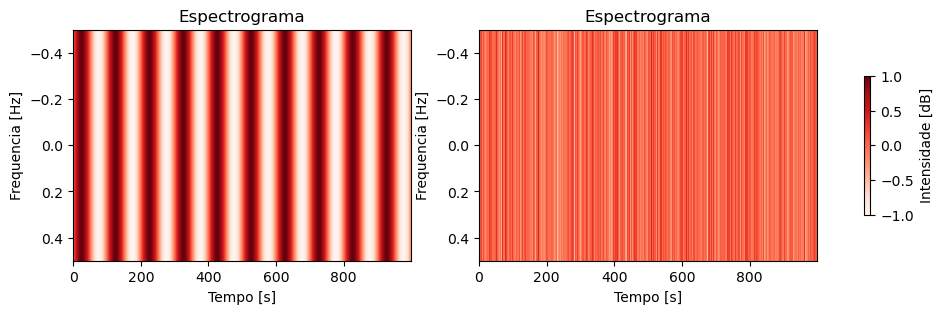

In [89]:
# Plot the spectrogram
fig = plt.figure(figsize=(12, 3))
gs = gridspec.GridSpec(1, 2, figure=fig)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

# Espectrograma do sinal com ruido
ax0.pcolormesh(tempo_espc, freq_resultante, 10 * np.log10(Sxx_resultante), shading='auto',cmap='Reds')
ax0.set_title('Espectrograma')
ax0.set_xlabel('Tempo [s]')
ax0.set_ylabel('Frequencia [Hz]')

# Espectrograma do ruido
ax1.pcolormesh(tempo_ruido, freq_ruido, 10 * np.log10(Sxx_ruido), shading='auto',cmap='Reds')
ax1.set_title('Espectrograma')
ax1.set_xlabel('Tempo [s]')
ax1.set_ylabel('Frequencia [Hz]')

im1 = ax0.imshow(x.reshape(1, -1), aspect='auto',cmap='Reds')
im2 = ax1.imshow(ruido.reshape(1, -1), aspect='auto',cmap='Reds')
cbar = fig.colorbar(im1, ax=[ax0, ax1], shrink=0.6, label='Intensidade [dB]')

> Repare que a região mais escura está justamente nos pontos de ordenadas iguais as frequências constituintes do sinal. Já os pontos mais claros representam pontos onde há interferência destrutiva